In [38]:
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [39]:
df=pd.read_csv("C:\\Users\\user\\Downloads\\nasdaq100.csv",sep=';')

In [40]:
df

,Date,Starting (USD),Ending (USD)
0,01.01.24,16800,16500
1,01.12.23,15900,16100
2,01.11.23,15800,15300
3,01.10.23,16100,16200
4,01.09.23,16300,15700
5,01.08.23,16800,16400
6,01.07.23,15900,16200
7,01.06.23,15800,15500
8,01.05.23,16150,16100
9,01.04.23,16300,15800


<Axes: xlabel='Starting (USD)', ylabel='Ending (USD)'>

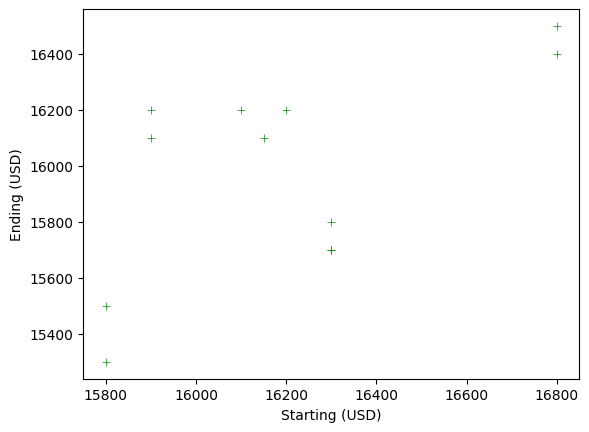

In [41]:
sns.scatterplot(data=df,x='Starting (USD)',y='Ending (USD)',marker='+',color='green')

In [42]:
x=df[['Starting (USD)']]
x

,Starting (USD)
0,16800
1,15900
2,15800
3,16100
4,16300
5,16800
6,15900
7,15800
8,16150
9,16300


In [43]:
y=df.drop(['Starting (USD)','Date'],axis=1)
y

,Ending (USD)
0,16500
1,16100
2,15300
3,16200
4,15700
5,16400
6,16200
7,15500
8,16100
9,15800


In [58]:
a=x.mean()
a

Starting (USD)    16195.833333
dtype: float64

In [59]:
b=y.mean()
b

Ending (USD)    15975.0
dtype: float64

In [60]:
reg=LinearRegression()

In [61]:
reg.fit(x,y)

LinearRegression()

In [62]:
m=reg.coef_
m

array([[0.65258293]])

In [63]:
c=reg.intercept_
c

array([5405.87555702])

In [64]:
m*16700+c

array([[16304.0105628]])

<Axes: xlabel='Starting (USD)', ylabel='Ending (USD)'>

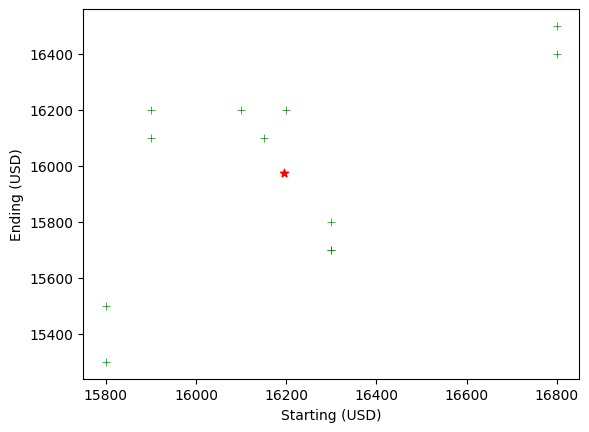

In [74]:
plt.scatter(a,b,color='red',marker='*')
sns.scatterplot(data=df,x='Starting (USD)',y='Ending (USD)',marker='+',color='green')


In [78]:
reg.predict([[16700]])

C:\Users\user\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[16304.0105628]])

In [79]:
df['predict_y']=reg.predict(x)

In [80]:
df

,Date,Starting (USD),Ending (USD),predict_y
0,01.01.24,16800,16500,16369.268856
1,01.12.23,15900,16100,15781.944215
2,01.11.23,15800,15300,15716.685922
3,01.10.23,16100,16200,15912.460802
4,01.09.23,16300,15700,16042.977389
5,01.08.23,16800,16400,16369.268856
6,01.07.23,15900,16200,15781.944215
7,01.06.23,15800,15500,15716.685922
8,01.05.23,16150,16100,15945.089949
9,01.04.23,16300,15800,16042.977389


<Axes: xlabel='Starting (USD)', ylabel='Ending (USD)'>

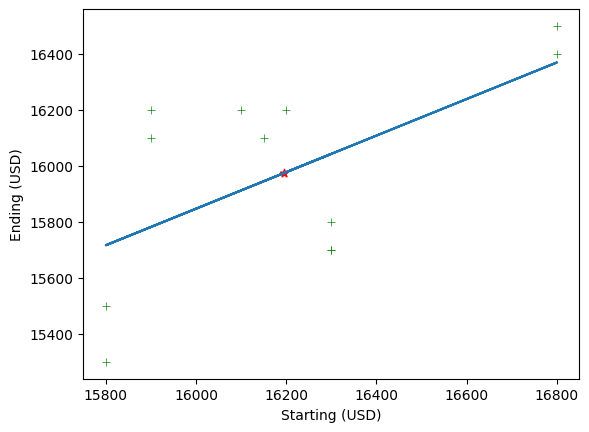

In [87]:
plt.plot(x,reg.predict(x))
plt.scatter(a,b,color='red',marker='*')
sns.scatterplot(data=df,x='Starting (USD)',y='Ending (USD)',marker='+',color='green')

In [88]:
df['lose']=df['Ending (USD)']-df['predict_y']

In [89]:
df

,Date,Starting (USD),Ending (USD),predict_y,lose
0,01.01.24,16800,16500,16369.268856,130.731144
1,01.12.23,15900,16100,15781.944215,318.055785
2,01.11.23,15800,15300,15716.685922,-416.685922
3,01.10.23,16100,16200,15912.460802,287.539198
4,01.09.23,16300,15700,16042.977389,-342.977389
5,01.08.23,16800,16400,16369.268856,30.731144
6,01.07.23,15900,16200,15781.944215,418.055785
7,01.06.23,15800,15500,15716.685922,-216.685922
8,01.05.23,16150,16100,15945.089949,154.910051
9,01.04.23,16300,15800,16042.977389,-242.977389


In [91]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [93]:
mse=mean_squared_error(df['Ending (USD)'],df['predict_y'])

In [94]:
mse

80411.23397700385

In [95]:
mae=mean_absolute_error(df['Ending (USD)'],df['predict_y'])
mae

260.3840017604666

In [96]:
reg.score(x,y)

0.3577804940272571

In [103]:
from sklearn.metrics import r2_score 
r2_score(y,reg.predict(x))

0.3577804940272571

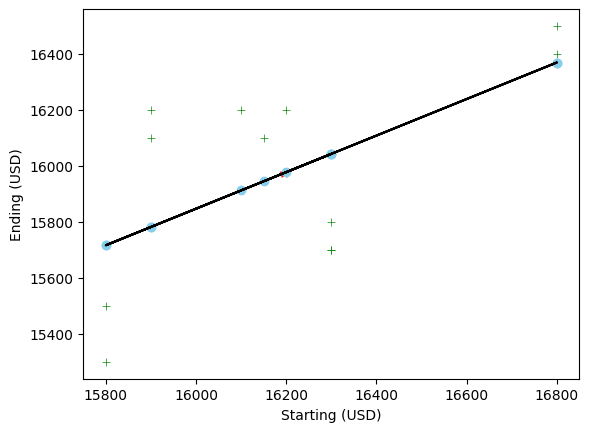

In [104]:
plt.plot(x,reg.predict(x),color='black')
plt.scatter(a,b,color='red',marker='*')
sns.scatterplot(data=df,x='Starting (USD)',y='Ending (USD)',marker='+',color='green')
plt.scatter(df['Starting (USD)'],reg.predict(x),color='skyblue')